In [30]:
import pandas as pd
predictions = pd.read_csv("pretrain_prediction.csv")
labels = pd.read_csv("private_test_labels.csv")

### calculate individual loss

In [33]:
labels = labels[labels.test_filter==1]
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C']
predictions = predictions[['id_seqpos'] + pred_cols]
labels = labels[['id'] + pred_cols]

In [34]:
prediction_dict = {}
for id_seqpos, reactivity, degpH10, degMg50C in predictions.values:
    pos = id_seqpos.split("_")[-1]
    seq_id = "_".join(id_seqpos.split("_")[:-1])
    p_dict = prediction_dict.get(seq_id,{})
    p_dict[int(pos)] = [float(reactivity), float(degpH10), float(degMg50C)]
    prediction_dict[seq_id] = p_dict
    

In [35]:
label_dict = {}
for seq_id, reactivity, degpH10, degMg50C in labels.values:
    reactivity = reactivity.strip('][').split(', ') 
    degpH10 = degpH10.strip('][').split(', ') 
    degMg50C = degMg50C.strip('][').split(', ') 
    l_dict = {}
    for i in range(len(reactivity)):
        l_dict[i] = [float(reactivity[i]),float(degpH10[i]),float(degMg50C[i])]
    label_dict[seq_id] = l_dict

In [150]:
total_prediction = []
total_label = []
for seq_id, l_dict in label_dict.items():
    p_dict = prediction_dict[seq_id]
    p, l = [], []
    for i in range(91):
        p += [p_dict[i]]
        l += [l_dict[i]]
    total_prediction += [p]
    total_label += [l]

In [151]:
import numpy as np
total_prediction = np.array(total_prediction)
total_label = np.array(total_label)

In [152]:
reactivity_data = np.stack([total_prediction[:,:,0].flatten(),total_label[:,:,0].flatten()],axis=1)
reactivity_frame = pd.DataFrame(reactivity_data, columns =['Predictions',"Labels"]) 

degpH10_data = np.stack([total_prediction[:,:,1].flatten(),total_label[:,:,1].flatten()],axis=1)
degpH10_frame = pd.DataFrame(degpH10_data, columns =['Predictions',"Labels"]) 

deg50C_data = np.stack([total_prediction[:,:,2].flatten(),total_label[:,:,2].flatten()],axis=1)
deg50C_frame = pd.DataFrame(deg50C_data, columns =['Predictions',"Labels"]) 


In [163]:
from sklearn.metrics import mean_squared_error
mean_squared_error(total_prediction[:,:,0].flatten(),total_label[:,:,0].flatten())

0.08707623920965867

In [164]:
mean_squared_error(total_prediction[:,:,1].flatten(),total_label[:,:,1].flatten())

0.2550073031684126

In [165]:
mean_squared_error(total_prediction[:,:,2].flatten(),total_label[:,:,2].flatten())

0.12577010081093487

Text(0.5, -0.15, 'Degradation rate with Mg at 50°C')

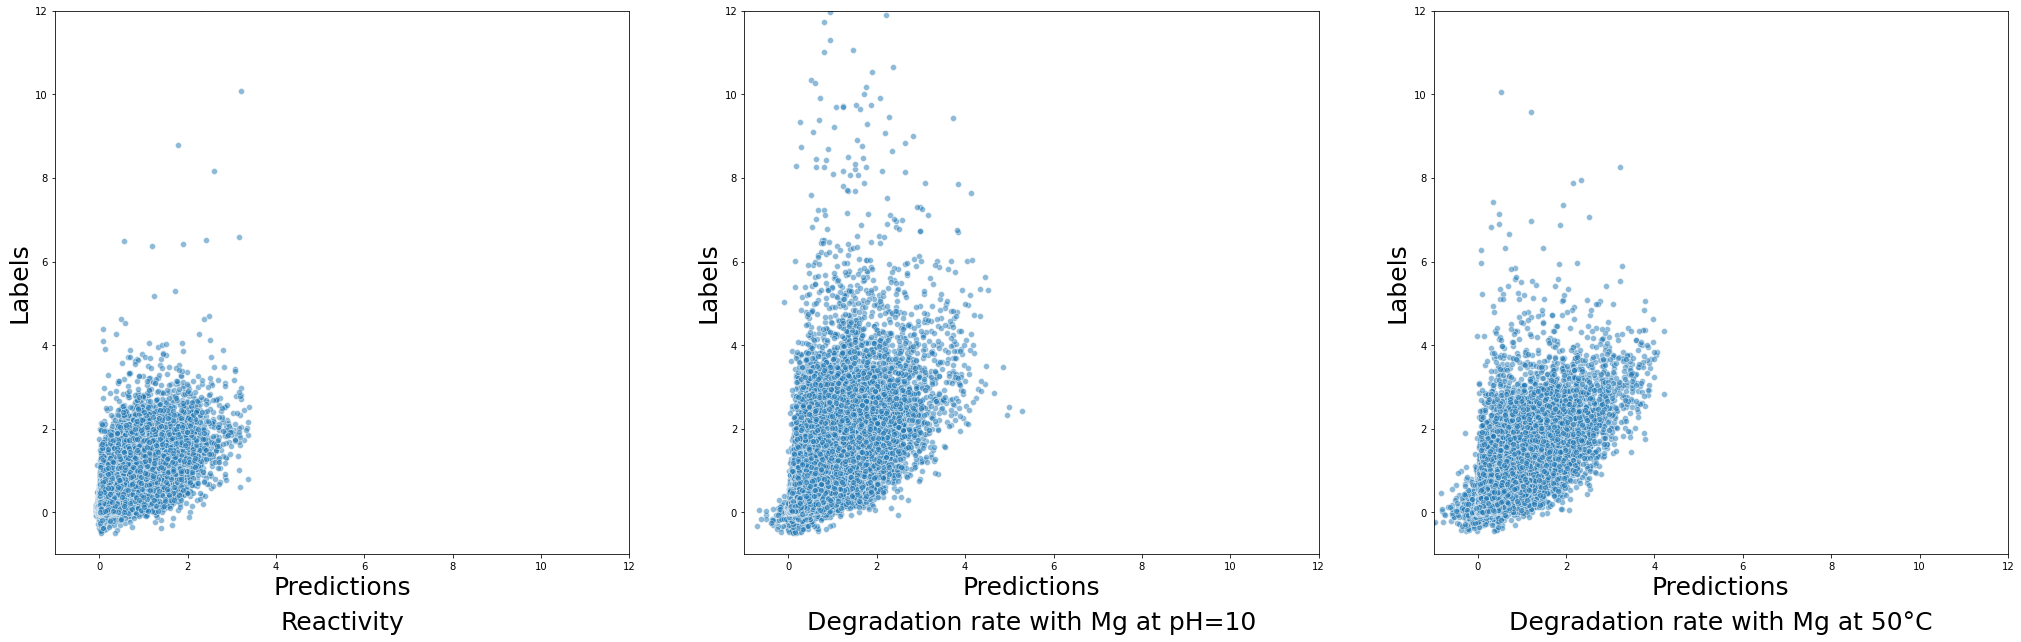

In [258]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(35,10))
plt.subplot(1, 3, 1)
sns.scatterplot(
    x="Predictions", y="Labels",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
    data=reactivity_frame,
    legend="full",
    alpha=0.5
)
plt.xlim([-1,12])
plt.ylim([-1,12])
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Labels', fontsize=25)
plt.title('Reactivity', fontsize=25,y=-0.15)

plt.subplot(1, 3, 2)
sns.scatterplot(
    x="Predictions", y="Labels",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
    data=degpH10_frame,
    legend="full",
    alpha=0.5
)
plt.xlim([-1,12])
plt.ylim([-1,12])
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Labels', fontsize=25)
plt.title('Degradation rate with Mg at pH=10', fontsize=25,y=-0.15)

plt.subplot(1, 3, 3)
sns.scatterplot(
    x="Predictions", y="Labels",
#     hue="y",
#     palette=sns.color_palette("hls", 10),
    data=deg50C_frame,
    legend="full",
    alpha=0.5
)
plt.xlim([-1,12])
plt.ylim([-1,12])
plt.xlabel('Predictions', fontsize=25)
plt.ylabel('Labels', fontsize=25)
plt.title('Degradation rate with Mg at 50°C', fontsize=25,y=-0.15)

In [130]:
first_prediction = []
first_label = []
later_prediction = []
later_label = []
for seq_id, l_dict in label_dict.items():
    p_dict = prediction_dict[seq_id]
    f_p,f_l = [],[]
    l_p,l_l = [],[]
    for i in range(91):
        if i < 68:
            f_p += [p_dict[i]]
            f_l += [l_dict[i]]
        else:
            l_p += [p_dict[i]]
            l_l += [l_dict[i]]
    first_prediction += [f_p]
    first_label += [f_l]
    later_prediction += [l_p]
    later_label += [l_l]

In [131]:
first_prediction = np.array(first_prediction)
first_label = np.array(first_label)
later_prediction = np.array(later_prediction)
later_label = np.array(later_label)

In [138]:
total_first_prediction1 = first_prediction[:,:,0].flatten()
total_first_prediction2 = first_prediction[:,:,1].flatten()
total_first_prediction3 = first_prediction[:,:,2].flatten()
first_type = ["reactivity" for i in range(len(total_first_prediction1))] + ["deg_Mg_pH10" for i in range(len(total_first_prediction1))] + ["deg_Mg_50C" for i in range(len(total_first_prediction1))]
total_first_prediction = np.concatenate([total_first_prediction1,total_first_prediction2,total_first_prediction3])

total_first_label1 = first_label[:,:,0].flatten()
total_first_label2 = first_label[:,:,1].flatten()
total_first_label3 = first_label[:,:,2].flatten()
total_first_label = np.concatenate([total_first_label1,total_first_label2,total_first_label3])

first_prediction_data = np.stack([total_first_prediction,total_first_label],axis=1)
first_prediction_frame = pd.DataFrame(first_prediction_data, columns =['Predictions',"Labels"])
first_prediction_frame['measurement type'] = first_type


In [314]:
total_later_prediction1 = later_prediction[:,:,0].flatten()
total_later_prediction2 = later_prediction[:,:,1].flatten()
total_later_prediction3 = later_prediction[:,:,2].flatten()
later_type = ["reactivity" for i in range(len(total_later_prediction1))] + ["deg_Mg_pH10" for i in range(len(total_later_prediction1))] + ["deg_Mg_50C" for i in range(len(total_later_prediction1))]
total_later_prediction = np.concatenate([total_later_prediction1,total_later_prediction2,total_later_prediction3])

total_later_label1 = later_label[:,:,0].flatten()
total_later_label2 = later_label[:,:,1].flatten()
total_later_label3 = later_label[:,:,2].flatten()
total_later_label = np.concatenate([total_later_label1,total_later_label2,total_later_label3])

later_prediction_data = np.stack([total_later_prediction,total_later_label],axis=1)
later_prediction_frame = pd.DataFrame(later_prediction_data, columns =['Predictions',"Labels"])
later_prediction_frame['measurement type'] = later_type


Text(0.5, -0.16, 'Labels vs. Predictions for bases 69 ~ 91 in the private test set')

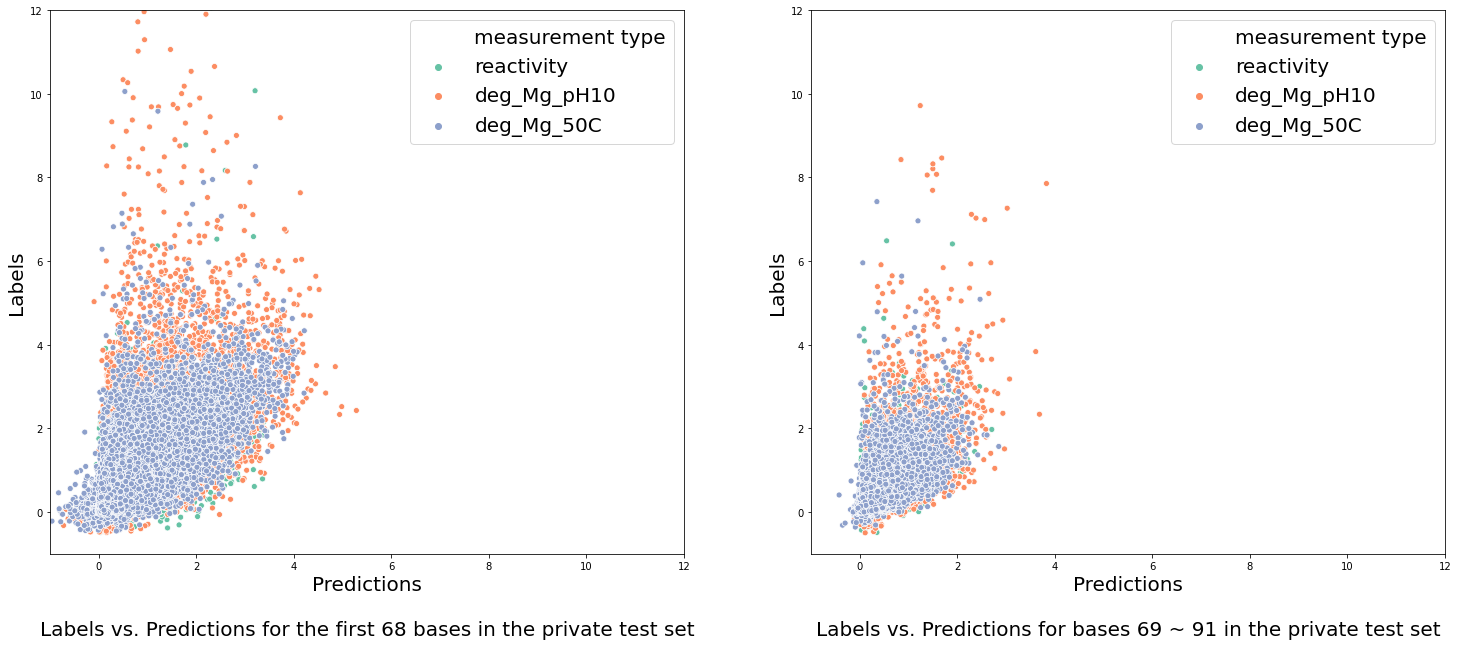

In [315]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
g = sns.scatterplot(
    x="Predictions", y="Labels",
    hue="measurement type",
    palette=sns.color_palette("Set2", 3),
    data=first_prediction_frame,
    legend="full",
    alpha=1
)
plt.legend(fontsize=20)
plt.xlim([-1,12])
plt.ylim([-1,12])
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Labels', fontsize=20)
plt.title('Labels vs. Predictions for the first 68 bases in the private test set', fontsize=20,y=-0.16)

plt.subplot(1, 2, 2)
g = sns.scatterplot(
    x="Predictions", y="Labels",
    hue="measurement type",
    palette=sns.color_palette("Set2", 3),
    data=later_prediction_frame,
    legend="full",
    alpha=1
)
# plt.legend(["reactivity","deg_Mg_pH10","deg_Mg_50C"])
plt.legend(fontsize=20)
plt.xlim([-1,12])
plt.ylim([-1,12])
plt.xlabel('Predictions', fontsize=20)
plt.ylabel('Labels', fontsize=20)
plt.title('Labels vs. Predictions for bases 69 ~ 91 in the private test set', fontsize=20,y=-0.16)

### calculate loss for the first 68 bases and remaining bases

In [171]:
import numpy as np
np.sqrt(mean_squared_error(first_prediction[:,:,0],first_label[:,:,0]))

0.30762545478445913

In [172]:
np.sqrt(mean_squared_error(first_prediction[:,:,1],first_label[:,:,1]))

0.5352759811064306

In [173]:
np.sqrt(mean_squared_error(first_prediction[:,:,2],first_label[:,:,2]))

0.372798287087012

In [174]:
(0.30762545478445913+0.5352759811064306+0.372798287087012)/3

0.40523324099263397

In [175]:
np.sqrt(mean_squared_error(later_prediction[:,:,0],later_label[:,:,0]))

0.2544273346973429

In [176]:
np.sqrt(mean_squared_error(later_prediction[:,:,1],later_label[:,:,1]))

0.40229121097094683

In [177]:
np.sqrt(mean_squared_error(later_prediction[:,:,2],later_label[:,:,2]))

0.29448089180309667

In [178]:
(0.2544273346973429+0.40229121097094683+0.29448089180309667)/3

0.3170664791571288

### tsne reduction 

In [186]:
training_sequences = pd.read_json("./stanford-covid-vaccine/train.json",lines=True).sequence.tolist()
test_sequences = pd.read_json("./stanford-covid-vaccine/test.json",lines=True).sequence.tolist()

In [206]:
public_test_sequences,private_test_sequences = [],[]
for seq in test_sequences:
    if len(seq) == 107:
        public_test_sequences += [seq]
    else:
        private_test_sequences += [seq[:107]]

In [199]:
# encode sequences 
def encode_seq(seq):
    code = np.zeros(len(seq))
    vocab = {"A":0,"U":1,"C":2,"G":3}
    for i in range(len(seq)):
        code[i] = vocab[seq[i]]
    return code

In [207]:
training_encoding = []
for seq in training_sequences:
    training_encoding += [encode_seq(seq)]
training_encoding = np.array(training_encoding)

In [208]:
public_test_encoding = []
for seq in public_test_sequences:
    public_test_encoding += [encode_seq(seq)]
public_test_encoding = np.array(public_test_encoding)

In [209]:
private_test_encoding = []
for seq in private_test_sequences:
    private_test_encoding += [encode_seq(seq)]
private_test_encoding = np.array(private_test_encoding)

In [213]:
from sklearn.manifold import TSNE

In [216]:
total_encoding = np.concatenate([training_encoding,public_test_encoding,private_test_encoding])


In [243]:
tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(total_encoding)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 6034 samples in 0.027s...
[t-SNE] Computed neighbors for 6034 samples in 5.186s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6034
[t-SNE] Computed conditional probabilities for sample 2000 / 6034
[t-SNE] Computed conditional probabilities for sample 3000 / 6034
[t-SNE] Computed conditional probabilities for sample 4000 / 6034
[t-SNE] Computed conditional probabilities for sample 5000 / 6034
[t-SNE] Computed conditional probabilities for sample 6000 / 6034
[t-SNE] Computed conditional probabilities for sample 6034 / 6034
[t-SNE] Mean sigma: 3.651170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.412056
[t-SNE] KL divergence after 1000 iterations: 1.549595


In [244]:
data_type = ["training" for i in range(len(training_encoding))] 
data_type += ["public test" for i in range(len(public_test_encoding))] 
data_type += ["private test" for i in range(len(private_test_encoding))] 
data_type = np.array(data_type)

In [245]:
tsne_em.shape

(6034, 2)

In [251]:
tsne_frame = np.stack([tsne_em[:,1],tsne_em[:,0]],axis=1)

In [252]:
data_frame = pd.DataFrame(tsne_frame, columns =['t-SNE dimension one',"t-SNE dimension two"])
data_frame["data type"] = data_type


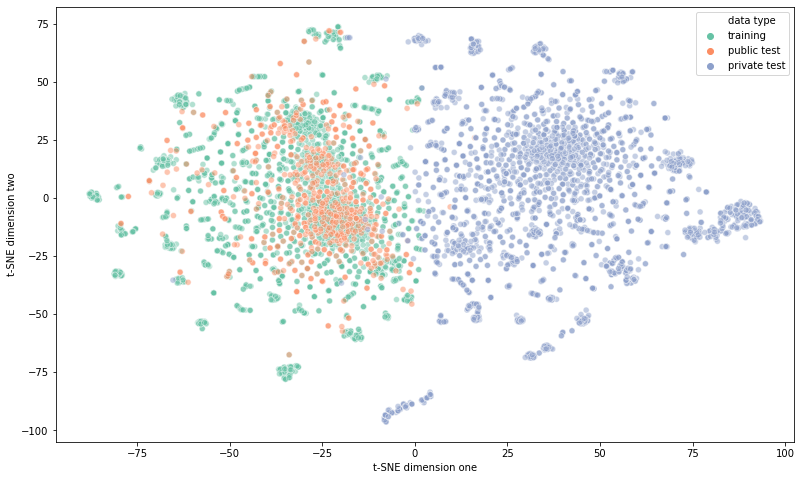

In [255]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(45,8))
plt.subplot(1, 3, 1)
sns.scatterplot(
    x="t-SNE dimension one", y="t-SNE dimension two",
    hue="data type",
    palette=sns.color_palette("Set2", 3),
    data=data_frame,
    legend="full",
    alpha=0.5
)
# plt.xlabel('Predictions', fontsize=25)
# plt.ylabel('Labels', fontsize=25)
# plt.title('Reactivity', fontsize=25,y=-0.15)

In [295]:
training = pd.read_json("./stanford-covid-vaccine/train.json",lines=True)

In [296]:
training = training[pred_cols].values

In [301]:
total_training = []
for t_list in training:
    for t in t_list:
        total_training += t

In [303]:
total_training = np.array(total_training)

In [309]:
len(np.where(total_training > 5)[0])/len(total_training)

0.0014501633986928105